In [1]:
#%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

print(tf.__version__)

import math

# get some random numbers
X = 10.0 * np.random.rand(20000)
X = pd.DataFrame(data=X)

# save some for testing
x_train = X.sample(frac=0.8)
x_test = X.drop(x_train.index)

# generate the ground truth
y_train = x_train.apply(math.sin, axis=1)
y_test = x_test.apply(math.sin, axis=1)

print(x_train, y_train)


2.3.1
              0
8740   0.630707
6312   6.484224
10009  2.404341
6713   4.772604
5008   9.152927
...         ...
19968  1.476869
5795   1.716516
12509  1.876936
17986  3.146883
10888  9.461055

[16000 rows x 1 columns] 8740     0.589716
6312     0.199687
10009    0.672256
6713    -0.998188
5008     0.268514
           ...   
19968    0.995592
5795     0.989402
12509    0.953504
17986   -0.005291
10888   -0.036269
Length: 16000, dtype: float64


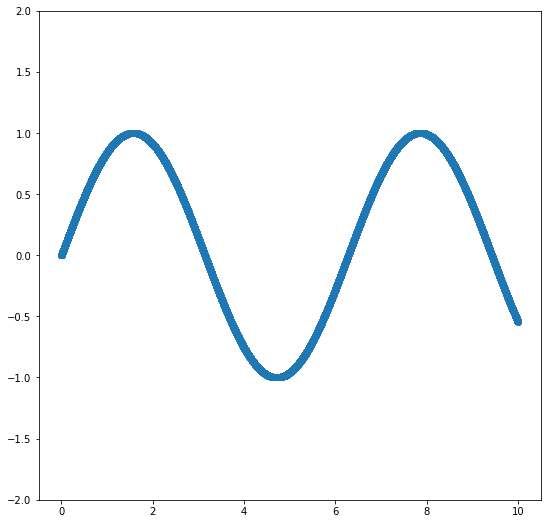

In [2]:

fig = plt.figure(figsize=(9,9))
plt.ylim([-2, 2])
plt.scatter(x_train, y_train)

In [3]:
#--------MODEL BUILDING
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(64, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(64, activation='relu', name="dense_02"),
    tf.keras.layers.Dense(64, activation='relu', name="dense_03"),
    # 1 node in the output for the sin(x)
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss='mae',
              # list of metrics to monitor
              metrics=['mae',])

model.summary()

1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_01 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_02 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_03 (Dense)             (None, 64)                4160      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 65        
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


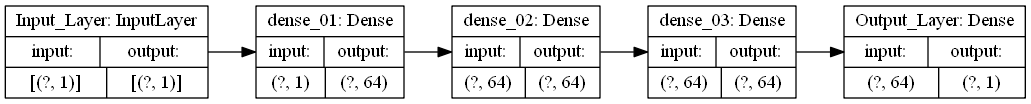

In [4]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96,
)

In [5]:
# Fit/Train model on training data
history = model.fit(x_train, y_train,
                    batch_size=20,
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
640/640 [==============================] - 1s 1ms/step - loss: 0.4298 - mae: 0.4298 - val_loss: 0.2576 - val_mae: 0.2576
Epoch 2/10
640/640 [==============================] - 1s 964us/step - loss: 0.2161 - mae: 0.2161 - val_loss: 0.1845 - val_mae: 0.1845
Epoch 3/10
640/640 [==============================] - 1s 820us/step - loss: 0.1438 - mae: 0.1438 - val_loss: 0.0963 - val_mae: 0.0963
Epoch 4/10
640/640 [==============================] - 1s 883us/step - loss: 0.1087 - mae: 0.1087 - val_loss: 0.0579 - val_mae: 0.0579
Epoch 5/10
640/640 [==============================] - 1s 933us/step - loss: 0.0970 - mae: 0.0970 - val_loss: 0.1153 - val_mae: 0.1153
Epoch 6/10
640/640 [==============================] - 1s 982us/step - loss: 0.0891 - mae: 0.0891 - val_loss: 0.0925 - val_mae: 0.0925
Epoch 7/10
640/640 [==============================] - 1s 943us/step - loss: 0.0827 - mae: 0.0827 - val_loss: 0.0332 - val_mae: 0.0332
Epoch 8/10
640/640 [==============================] - 1s 1ms/ste

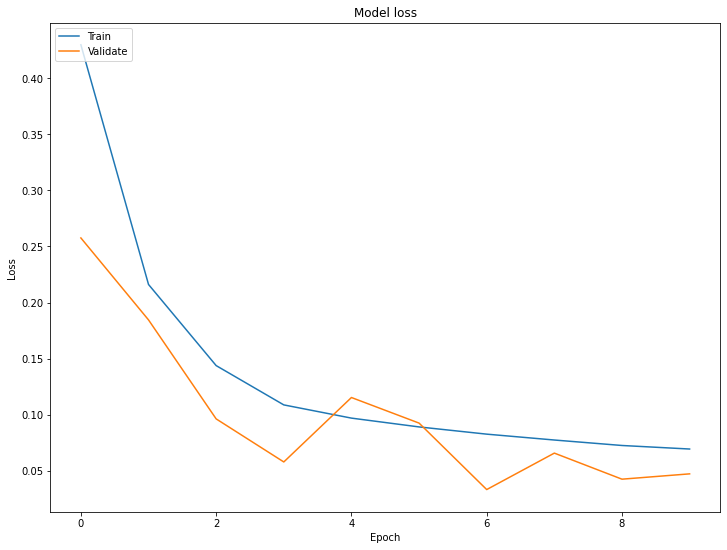

In [6]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [7]:
#--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)

125/125 - 0s - loss: 0.0480 - mae: 0.0480
Loss: 0.0480368435382843 MAE: 0.0480368435382843


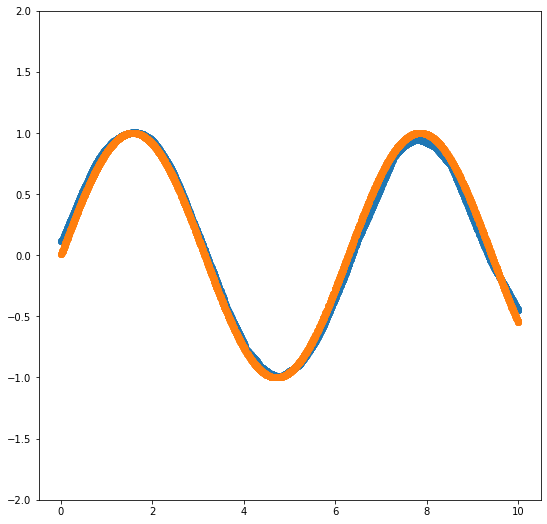

In [8]:
#--------PREDICT
p_test = model.predict(x_test)

fig = plt.figure(figsize=(9,9))
#plt.xlim([-3, 3])
plt.ylim([-2, 2])
#a = plt.axes(aspect='equal')
plt.scatter(x_test, p_test)
plt.scatter(x_test, y_test)


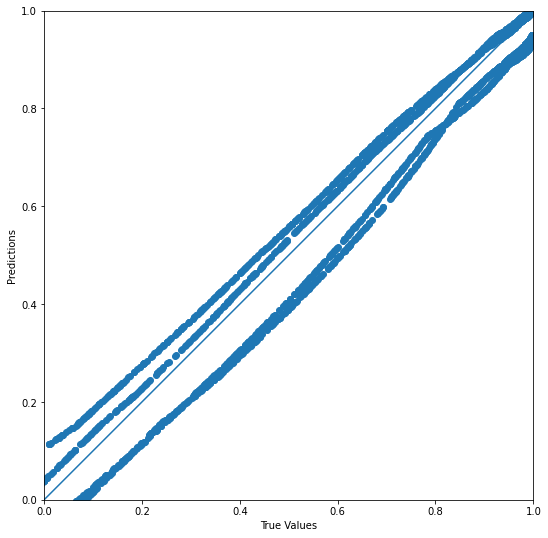

In [9]:
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

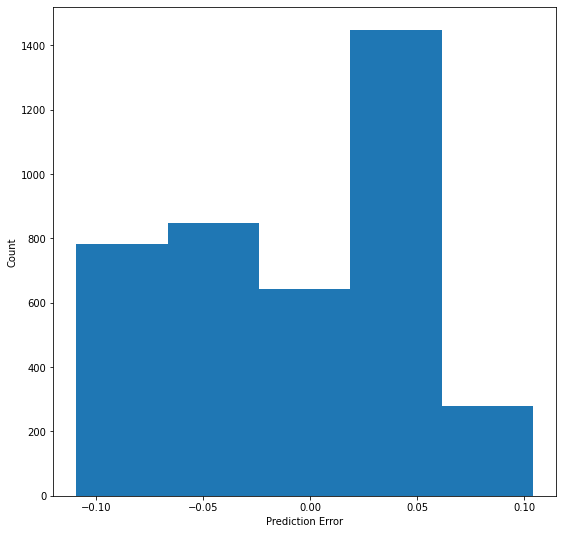

In [10]:
#---------PLOT the distribution of errors
fig = plt.figure(figsize=(9,9))
error = p_test.flatten() - y_test
plt.hist(error, bins = 5)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()